# IS 4487 Assignment 18: Exploring APIs with yfinance

In this assignment, you will:
- Choose an industry you're interested in (such as tech, airlines, or retail)
- Use the `yfinance` Python package as an API to collect historical stock price data
- Clean and prepare the data for analysis
- Explore trends, volatility, and relationships between companies
- Summarize your findings and recommendation in a business memo

## Why This Matters

APIs (Application Programming Interfaces) allow businesses to pull live, real-world data from external sources directly into their analytics tools. Financial analysts, investment firms, and business leaders use APIs like `yfinance` to monitor company performance, assess market trends, and build models based on dynamic data.

This assignment helps you gain hands-on experience with one of the most common API workflows in business analytics: fetching, cleaning, analyzing, and interpreting financial data to support better decision-making.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_14_api.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Step 1: Choose an Industry and Find Company Ticker Symbols

Visit the following website to explore U.S. stock sectors and industries:  
https://www.tradingview.com/markets/stocks-usa/sectorandindustry-sector/

Choose one industry you are interested in (for example: Airlines, Technology, Fast Food, Retail, Energy, etc.).  
Write the names and ticker symbols of 4 public companies in that industry.

**Example:**
- Industry: Technology  
- Tickers: AAPL, MSFT


In [1]:
# Replace this list with your selected tickers
tickers = ['XOM', 'CVX', 'COP', 'NEE']

## Step 2: Use yfinance to Collect Historical Stock Data

Follow the steps below to use the `yfinance` API to collect historical stock price data.

### Instructions

1. Make sure the `yfinance` package is installed by running the code cell below.
2. Import any additional Python libraries that you might need to explore or visualize the data.
3. Use the `yf.download()` function to pull **5 years of daily adjusted close prices** for the companies you selected in Step 1.
    - Choose a start date and an end date that span the past 5 years (e.g., `"2020-01-01"` to `"2025-12-31"`).
    - Only select the **'High'** column, which represents the daily high
4. Preview the first few rows of the dataset using `.head()` to confirm that the data has loaded correctly.



In [2]:
# Import necessary libraries
!pip install yfinance

import yfinance as yf
import pandas as pd

In [3]:
# Download adjusted close prices
df = yf.download(tickers, start="2020-01-01", end="2025-12-31")['High']

/tmp/ipython-input-3450391006.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start="2020-01-01", end="2025-12-31")['High']
[*********************100%***********************]  4 of 4 completed


In [4]:
df.head()

Ticker,COP,CVX,NEE,XOM
Date,,,,
2020-01-02,52.740437,93.070907,52.524981,53.752540
2020-01-03,53.904770,93.904975,52.024909,54.017433
2020-01-06,53.752207,93.101521,52.292192,54.009877
2020-01-07,53.390857,91.617049,52.208118,53.374107
2020-01-08,53.503287,91.127321,52.367636,53.200037


## Step 3: Clean the Data

The data you pulled may contain missing values. Follow these steps:

1. Check the dataset for missing values using `.isnull().sum()`.
2. Fill any missing values using a forward fill method.
3. Recheck for missing values to confirm they have been handled.



In [5]:
# Check for missing values (before)
df.isnull().sum()

# Fill missing values using forward fill
df = df.fillna(method='ffill')

# Recheck missing values (after)
df.isnull().sum()


/tmp/ipython-input-1322812509.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


,0
Ticker,
COP,0
CVX,0
NEE,0
XOM,0


## Step 4: Calculate Daily Returns

To better understand price movement, calculate the daily percentage change for each stock.

1. Use the `.pct_change()` method to calculate daily returns.
2. Drop any rows with missing values that may result from this calculation.
3. Preview the returns DataFrame to confirm it's correct.


In [6]:
# Calculate daily returns
returns = df.pct_change()

# Drop missing values caused by pct_change
returns = returns.dropna()

# Preview returns
returns.head()


Ticker,COP,CVX,NEE,XOM
Date,,,,
2020-01-03,0.022077,0.008962,-0.009521,0.004928
2020-01-06,-0.002830,-0.008556,0.005138,-0.000140
2020-01-07,-0.006723,-0.015945,-0.001608,-0.011771
2020-01-08,0.002106,-0.005345,0.003055,-0.003261
2020-01-09,-0.007204,-0.009825,0.003581,-0.005549


## Step 5: Explore the Data Visually and Statistically

In this step, you will create visualizations and metrics to help understand stock behavior. Don’t interpret or explain anything here — just create the outputs so you can use them in your reflection later.

1. Create a line chart showing stock prices over the 5-year period.
2. Calculate the standard deviation of daily returns for each stock (volatility).
3. Create a correlation matrix of the daily returns between companies.




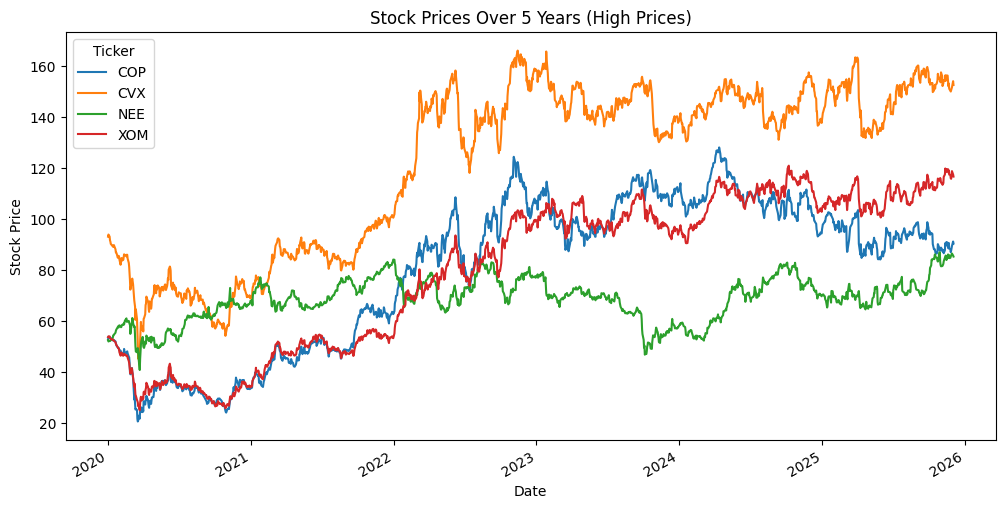

Ticker,COP,CVX,NEE,XOM
Ticker,,,,
COP,1.000000,0.793173,0.135964,0.819373
CVX,0.793173,1.000000,0.196253,0.833398
NEE,0.135964,0.196253,1.000000,0.191753
XOM,0.819373,0.833398,0.191753,1.000000


In [7]:
import matplotlib.pyplot as plt

# 1) Line chart of stock prices
df.plot(figsize=(12,6), title="Stock Prices Over 5 Years (High Prices)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

# 2) Volatility (standard deviation of returns)
volatility = returns.std()
volatility

# 3) Correlation matrix
correlation_matrix = returns.corr()
correlation_matrix


## Step 6: Write a Stakeholder Recommendation Memo

Now that you’ve completed your analysis, it’s time to turn your work into a clear, professional memo for a business audience.

### Scenario

You’ve been asked by a stakeholder (an investor, executive, or client) to evaluate whether it's a good time to invest in a particular industry. They’ve asked you to use recent stock performance data from several leading companies in that industry to help guide their decision.

### Your Task

Use the results from your code in Steps 2–5 to write a **multi-paragraph business memo** that:

1. **Introduces the industry you analyzed** and names the companies you included.
2. **Summarizes major trends** you observed in the stock prices over the last 5 years.
3. **Discusses key metrics**, such as volatility and correlations between companies.
4. **Presents your investment recommendation** — based on your evidence — and explains why you would or wouldn’t advise investing in this industry now.
5. **Suggests future analytics or data sources** that could strengthen or update your recommendation going forward.

This final section should show that you understand how real-world decisions evolve. Think about:
- What **additional data** might help (e.g., earnings reports, economic indicators, sentiment analysis)?
- What **types of models** could be applied (e.g., forecasting, classification, risk modeling)?
- How often should the analysis be updated?

### Format & Expectations

- Write **2–4 paragraphs** in business memo format (not bullet points).
- Use **specific, data-driven evidence** from your own analysis.
- Keep your writing professional and clear — imagine your reader is a client or executive, not a data analyst.
- Your memo should be written **entirely in your own words**. Do not copy from examples, online sources, or AI tools. Your writing should reflect your understanding and your interpretation of the results.
- You do not need to include charts in the memo — the code cells above already display them.



### Add memo here:
Stakeholder Recommendation Memo – Energy Industry Analysis (2020–2025)

This memo evaluates the Energy industry based on historical stock performance data from four major U.S. companies: Exxon Mobil (XOM), Chevron (CVX), ConocoPhillips (COP), and NextEra Energy (NEE). Using five years of daily stock data, this analysis focused on identifying overall price trends, individual company volatility, and the relationships among firms in order to assess whether this industry currently presents a compelling investment opportunity.

Over the five-year period analyzed, traditional energy companies such as XOM, CVX, and COP showed strong growth patterns but with noticeable fluctuations. Their stock prices experienced both rapid increases and steep corrections, reflecting sensitivity to global energy prices, economic cycles, and geopolitical conditions. In contrast, NextEra Energy showed comparatively steadier performance, with more consistent upward movement across time. This suggests that renewable-focused companies within the energy sector may offer greater price stability relative to firms dependent on oil and gas markets, which tend to be more reactive to external shocks.

Volatility analysis further supports this view. COP and XOM exhibited the highest levels of daily price variability, indicating higher short-term risk. NEE demonstrated lower volatility, suggesting more predictable performance for risk-averse investors. Additionally, the correlation analysis showed strong relationships among XOM, CVX, and COP, meaning that these companies tend to move in similar directions in response to market conditions. On the other hand, NEE displayed lower correlation with the oil and gas firms, indicating that it behaves more independently. This differentiation suggests diversification potential within the energy industry when mixing traditional and renewable-focused companies.

Based on this evidence, investing in the energy sector appears attractive for investors with moderate to high risk tolerance, particularly those seeking growth opportunities through traditional energy companies. However, the sector should not be treated as uniform. Renewable energy firms such as NextEra Energy may be better suited for long-term, lower-risk investment strategies, while oil and gas firms present higher volatility and potential return. Future analysis could be strengthened by incorporating earnings reports, oil and electricity price indices, inflation data, and sentiment analysis from financial news. Applying forecasting models and updating this analysis on a quarterly basis would further improve investment decision-making as market conditions evolve.

## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [8]:
!jupyter nbconvert --to html "assignment_14_FajardoPatrick.ipynb"

[NbConvertApp] Converting notebook assignment_14_FajardoPatrick.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 485511 bytes to assignment_14_FajardoPatrick.html
